<a href="https://colab.research.google.com/github/HindCatBlacknDark/Time-series-agricultural-synteticdataset/blob/main/TS_data1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Let's generate a synthetic Time series dataset

I will try to generate a synthetic time series data.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Generate synthetic time series data
np.random.seed(0)

# Define the number of weeks and treatment combinations
num_weeks = 20
num_treatments = 4
num_replicates = 5

# Generate time index
time_index = pd.date_range(start='2023-01-01', periods=num_weeks, freq='W')

# Generate treatment combinations
treatments = ['A', 'B', 'C', 'D']

In [ ]:
# Generate input features (temperature, rain, soil pH)
temperature = np.random.normal(loc=25, scale=5, size=(num_weeks, num_treatments))
rain = np.random.normal(loc=50, scale=20, size=(num_weeks, num_treatments))
soil_ph = np.random.normal(loc=6.5, scale=0.5, size=(num_weeks, num_treatments))

In [ ]:
yield_data = np.random.normal(loc=50, scale=10, size=(num_weeks, num_treatments))
biomass = np.random.normal(loc=100, scale=20, size=(num_weeks, num_treatments))
canopy = np.random.normal(loc=80, scale=15, size=(num_weeks, num_treatments))

In [ ]:
data = {
    'Time': np.repeat(time_index, num_treatments * num_replicates),
    'Treatment': np.tile(np.repeat(treatments, num_replicates), num_weeks),
    'Temperature': temperature.flatten(),
    'Rain': rain.flatten(),
    'Soil_pH': soil_ph.flatten(),
    'Yield': yield_data.flatten(),
    'Biomass': biomass.flatten(),
    'Canopy': canopy.flatten()
}

In [ ]:
print(data)

{'Time': DatetimeIndex(['2023-01-01', '2023-01-01', '2023-01-01', '2023-01-01',
               '2023-01-01', '2023-01-01', '2023-01-01', '2023-01-01',
               '2023-01-01', '2023-01-01',
               ...
               '2023-05-14', '2023-05-14', '2023-05-14', '2023-05-14',
               '2023-05-14', '2023-05-14', '2023-05-14', '2023-05-14',
               '2023-05-14', '2023-05-14'],
              dtype='datetime64[ns]', length=400, freq=None), 'Treatment': array(['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C',
       'C', 'C', 'D', 'D', 'D', 'D', 'D', 'A', 'A', 'A', 'A', 'A', 'B',
       'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C', 'D', 'D', 'D', 'D',
       'D', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'C', 'C',
       'C', 'C', 'C', 'D', 'D', 'D', 'D', 'D', 'A', 'A', 'A', 'A', 'A',
       'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C', 'D', 'D', 'D',
       'D', 'D', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'C',
       'C', 'C', 'C', 

there was an error, some arrays had different lengths, so we'll find the shortest arrays and truncate the other arrays to shortest length

In [ ]:
min_length = min([len(arr) for arr in data.values()])
for key, arr in data.items():
    if len(arr) > min_length:
        data[key] = arr[:min_length]

problem solved

In [ ]:
# Create DataFrame
df = pd.DataFrame(data)

In [ ]:
# Display the DataFrame
print(df.head())

        Time Treatment  Temperature       Rain   Soil_pH      Yield  \
0 2023-01-01         A    33.820262  26.697003  6.250984  43.625630   
1 2023-01-01         A    27.000786  68.016530  7.464766  46.027282   
2 2023-01-01         A    29.893690  59.313249  6.974710  48.671194   
3 2023-01-01         A    36.204466  19.275126  6.543776  47.022091   
4 2023-01-01         A    34.337790  79.765044  5.887282  46.909870   

      Biomass     Canopy  
0   85.607912  71.020191  
1   83.740140  63.261545  
2  105.490327  91.499948  
3   82.181698  85.344392  
4   76.852895  53.471923  


## Let's visualize this data using PCA

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
# Separate features (input variables) and target variables (output variables)
features = df[['Temperature', 'Rain', 'Soil_pH']]
targets = df[['Yield', 'Biomass', 'Canopy']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Create a DataFrame for principal components
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Concatenate principal components DataFrame with target variables
final_df = pd.concat([pc_df, targets], axis=1)

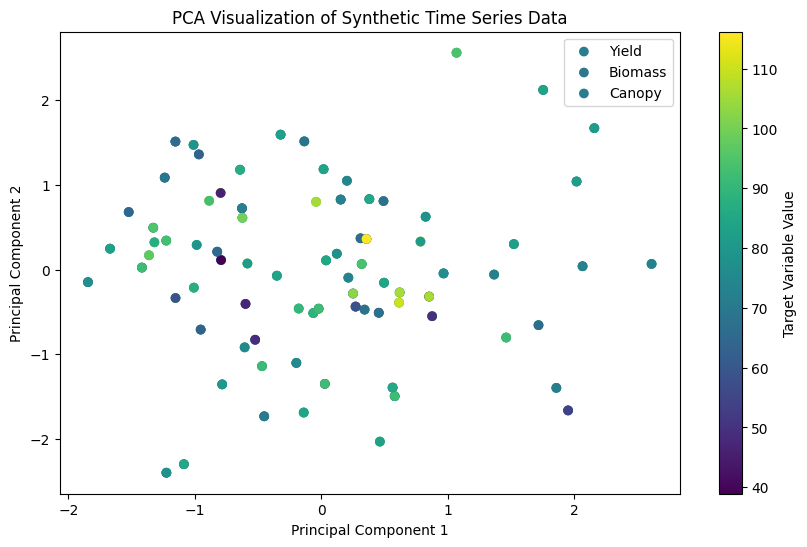

In [ ]:
plt.figure(figsize=(10, 6))
for target in ['Yield', 'Biomass', 'Canopy']:
    plt.scatter(final_df['PC1'], final_df['PC2'], c=final_df[target], cmap='viridis', label=target)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Synthetic Time Series Data')
plt.colorbar(label='Target Variable Value')
plt.legend()
plt.show()

# Let's use a regression model that captures trend of time

In [ ]:
import statsmodels.api as sm

In [ ]:
# Define input features (including time)
X = df[['Temperature', 'Rain', 'Soil_pH', 'Time']]

# Add intercept term
X = sm.add_constant(X)

# Define output variables
y = df[['Yield', 'Biomass', 'Canopy']].values  # Convert to NumPy array

In [ ]:
np.asarray(data)

array({'Time': DatetimeIndex(['2023-01-01', '2023-01-01', '2023-01-01', '2023-01-01',
               '2023-01-01', '2023-01-01', '2023-01-01', '2023-01-01',
               '2023-01-01', '2023-01-01', '2023-01-01', '2023-01-01',
               '2023-01-01', '2023-01-01', '2023-01-01', '2023-01-01',
               '2023-01-01', '2023-01-01', '2023-01-01', '2023-01-01',
               '2023-01-08', '2023-01-08', '2023-01-08', '2023-01-08',
               '2023-01-08', '2023-01-08', '2023-01-08', '2023-01-08',
               '2023-01-08', '2023-01-08', '2023-01-08', '2023-01-08',
               '2023-01-08', '2023-01-08', '2023-01-08', '2023-01-08',
               '2023-01-08', '2023-01-08', '2023-01-08', '2023-01-08',
               '2023-01-15', '2023-01-15', '2023-01-15', '2023-01-15',
               '2023-01-15', '2023-01-15', '2023-01-15', '2023-01-15',
               '2023-01-15', '2023-01-15', '2023-01-15', '2023-01-15',
               '2023-01-15', '2023-01-15', '2023-01-15', '2023

In [ ]:
print(y.dtype)
print(X.dtypes)

float64
const                 float64
Temperature           float64
Rain                  float64
Soil_pH               float64
Time           datetime64[ns]
dtype: object


In [ ]:
print(df.dtypes)

Time           datetime64[ns]
Treatment              object
Temperature           float64
Rain                  float64
Soil_pH               float64
Yield                 float64
Biomass               float64
Canopy                float64
dtype: object


Since 'Time' is a datetime variable, we need to encode it appropriately before fitting the model. One common approach is to extract features like year, month, day, etc., from the datetime variable.

In [ ]:
# Extract features from the datetime variable
df['Year'] = df['Time'].dt.year
df['Month'] = df['Time'].dt.month
df['Day'] = df['Time'].dt.day

# Drop the original 'Time' column
df.drop(columns=['Time'], inplace=True)

# Add a constant term to the features
features = sm.add_constant(df.drop(columns=['Yield', 'Biomass', 'Canopy', 'Treatment']))

# Fit the regression model for Yield
model_yield = sm.OLS(df['Yield'], features)
results_yield = model_yield.fit()

# Print summary of the regression model for Yield
print(results_yield.summary())

# Fit the regression model for Biomass
model_biomass = sm.OLS(df['Biomass'], features)
results_biomass = model_biomass.fit()

# Print summary of the regression model for Biomass
print(results_biomass.summary())

# Fit the regression model for Canopy
model_canopy = sm.OLS(df['Canopy'], features)
results_canopy = model_canopy.fit()

# Print summary of the regression model for Canopy
print(results_canopy.summary())

                            OLS Regression Results                            
Dep. Variable:                  Yield   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                 -0.025
Method:                 Least Squares   F-statistic:                    0.5157
Date:                Wed, 27 Mar 2024   Prob (F-statistic):              0.724
Time:                        12:49:46   Log-Likelihood:                -293.24
No. Observations:                  80   AIC:                             596.5
Df Residuals:                      75   BIC:                             608.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Temperature     0.0361      0.233      0.155      

This code will fit separate regression models for 'Yield', 'Biomass', and 'Canopy' using 'Temperature', 'Rain', 'Soil_pH', 'Year', 'Month', and 'Day' as independent variables. The summary method will print a summary of each regression result, providing insights into the relationships between the independent variables and the dependent variables over time.

In [ ]:
!pip freeze --local > requirements.txt
